# metodo de aceleracion de caida con gradiente del momentum.
Heavy ball, por que una pelota liviana brinca mucho y pesada brinca menos.

El camino normal de SD( steepest descent) es,

$$\theta^{(i-1)} \rightarrow \theta^{(i)} = \theta^{(i-1)} - \nabla g^{(i-1)} \rightarrow \theta^{(i+1)}= \theta^{(i)} - \eta g^{(i)}  .$$


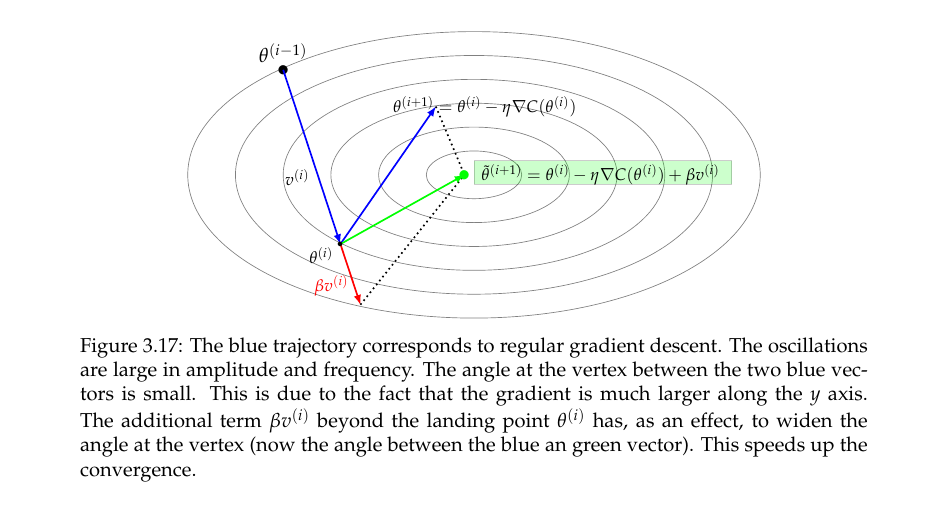

El metodo del momentum usa la ecuacion:

$$ \theta^{(i+1)} = \theta^{(i)} - \eta g^{(i)} + \beta v^{(i)}.$$

Existe en la literatura otra presentacion de esta ecuacion, partida en dos

\begin{eqnarray}
v^{(k)} &=& \beta v^{(k-1)} - \eta g^{(k-1)} \\
\theta^{(k)}  &=& \theta^{(k-1)} + v^{(k)}.
\end{eqnarray}

Hay otra presentacion distinta de este algoritmo


$$\theta^{(i+1)} = \theta^{(i)} - \eta g^{(i)} + \beta(\theta^{(i)} - \theta^{(i-1)}) \tag{9} .$$

Incluso, esta formula es la que aparece en el articulo original de Poliak, Ecuacion (9).





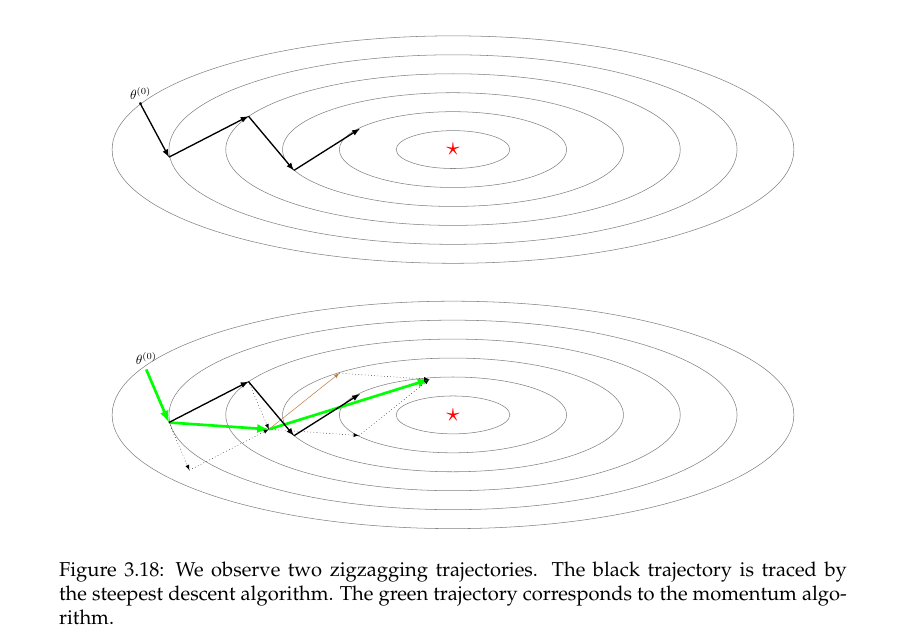

En la figura anterior (calculada con TiKz) se observa como la trayectoria verde (con momento) es mejor que la negra (sin momento).

Hay otro "approach" para el metodo del momento, donde el proximo gradiente se calcula como un promedio ponderado de los dos anteriores. Esto es:


\begin{eqnarray}
v^{(k)} &=& \beta v^{(k-1)} + (1 - \beta) g^{(k)} \\
\theta^{(k)} &=& \theta^{(k-1)} - \eta v^{(k)}
\end{eqnarray}
En la ecuacion anterior es claro que si $\beta=0$, se reduce al
SD clasico (no momentum). Ahora bien, si $\beta=1$ estamos en problemas, por que el metodo se queda "estatico". Se mueve a lo largo de una linea recta. Si $\beta=0.5$ entonces cada nuevo gradiente es el promedio aritmetico de los dos anteriores.  
Normalmente $\beta \in (0,1)$ pero se sugiere (empirico) $\beta \in [0.8, 0.99]$. Veamos el agoritmo basado en estas ecuaciones.




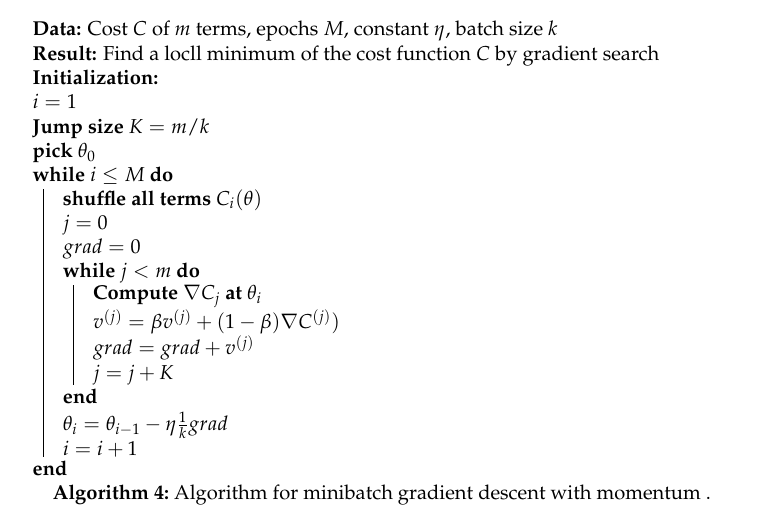

La pagina

[How momentum really works](https://csinva.io/pres/189/assets_files/saved_resource.html) le permite "jugar" con los parametros $\eta, \beta$, (note que $\eta$ en la pagina es $\alpha$.  Hay un problema en la proxima tarea sobre esto.

El proximo ejemplo (en Python) es en una sola dimension (dominio),  $f: A \subset \mathbb{R} \to \mathbb{R}$,
ojo los contornos aca son puntos y no ayudan a ninguna interpretacion. Por que una dimension (de dominio) por "pereza"

La funcion que escojo es $f(x)=x^4$ (basada en
[BoostedML](https://boostedml.com/2020/07/gradient-descent-and-momentum-the-heavy-ball-method.html))
tiene varias caracteristicas simples:

* Es simple (dominio 1D, polinomio de un solo termino, monomio)
* analitica
* el gradiente es simple $f'(x)=4 x^3$.
* El minimo es 0
* La curvatura cambia mucho, se vuelve casi cero (plana) cerca al minimo. Esto puede hacer diferencia, como veremos en los ejemplos.








## Steepest Descent

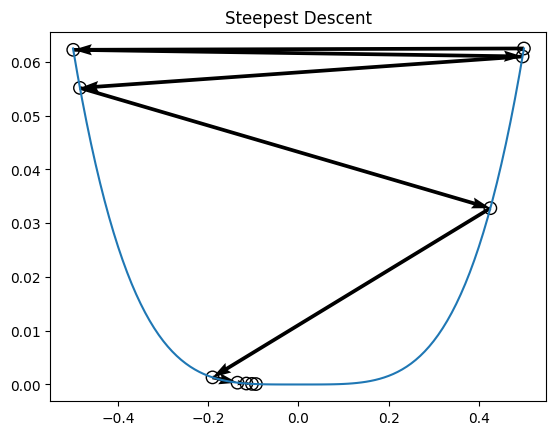

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# funcion facil
def f(x):
    return x**4

# gradiente
def gradf(x):
    return 4*x**3

# un eta forzada (hard coded)
eta = 1.999

# punto inicial
x=0.5 # yo uso theta , pero en este ejemplo sea x

# lista de puntos
xlist = [x]
ylist = [f(x)]

M=10 # iteraciones
for i in range(1,M):
    x = x - eta*gradf(x)
    y = f(x)
    xlist.append(x)
    ylist.append(y)


# graficamos
# casting list to array
xarr = np.array(xlist)
yarr = np.array(ylist)

xdomain = np.arange(-0.5, 0.51, 0.01)
plt.title("Steepest Descent")
plt.plot(xdomain, f(xdomain))

plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:] - yarr[:-1], \
           scale_units='xy', angles='xy', scale=1)


plt.scatter(xlist, ylist, s=80, facecolors='none', edgecolors='k')
# plt.savefig("sd.pdf")

plt.show()





## Poliak $\theta^{(i)} = \theta^{(i-1)} - \eta \nabla f(\theta) + \beta ( \theta^{(i)} - \theta^{(i-1)})$


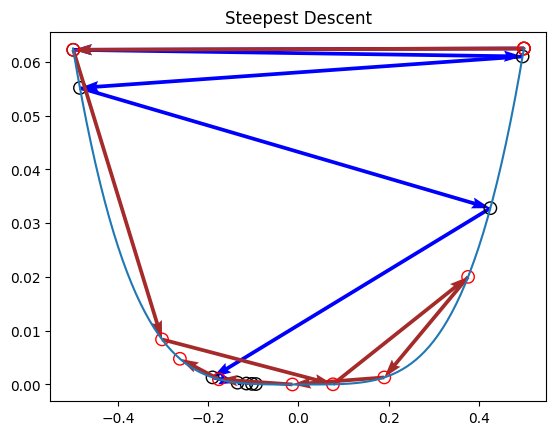

In [5]:
# punto inicial
x=0.5 # yo uso theta , pero en este ejemplo sea x

# lista de puntos
xlist2 = [x]
ylist2 = [f(x)]

beta = 0.8
M=10 # iteraciones
for i in range(1,M):
    xlist2.append(x)
    ylist2.append(f(x))
    x = x - eta*gradf(x) + beta*(xlist2[i]-xlist2[i-1])


# graficamos
# casting list to array
xarr2 = np.array(xlist2)
yarr2 = np.array(ylist2)

xdomain = np.arange(-0.5, 0.51, 0.01)
plt.title("Steepest Descent")
plt.plot(xdomain, f(xdomain))

plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:] - yarr[:-1], \
           scale_units='xy', angles='xy', scale=1, color='blue')


plt.scatter(xlist, ylist, s=80, facecolors='none', edgecolors='k')
# plt.savefig("sd.pdf")

plt.quiver( xarr2[:-1], yarr2[:-1], xarr2[1:]-xarr2[:-1], yarr2[1:] - yarr2[:-1], \
           scale_units='xy', angles='xy', scale=1, color='brown')


plt.scatter(xlist2, ylist2, s=80, facecolors='none', edgecolors='r')

plt.show()
